<img src="https://www.highereducationdigest.com/wp-content/uploads/2021/03/IIIT-B-Upgrad.jpg" class = "center" width = "240" height="360" />



   # ADVANCED LINEAR REGRESSION ASSIGNMENT
                                                             - Vignesh G

## Table of Content

1. [Problem Statement](#section1)<br>    
2. [Data Description](#section2)<br>
3. [Data cleaning](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Training linear regression model](#section5)<br>
    - 5.1 [Splitting data into trainset and testset](#section501)<br>
    - 5.2 [Rescaling the features](#section502)<br>
    - 5.3 [Splitting into X_train and y_train on training dataset](#section503)<br>
6. [Testing Linear regression model](#section6)<br>

7. [Model evaluation](#section7)<br>

8. [Conclusion](#section8)<br>
    


## 1. Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.



-  Which variables are significant in predicting the price of a house, and
-  How well those variables describe the price of a house.

## 2. Data Description

   ##### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for   management to understand the pricing dynamics of a new market.



## Importing Necessary Libraries

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.5, color_codes=True)      # To apply seaborn styles to the plots.

%matplotlib inline                                                

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import KFold,cross_val_score

In [270]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [289]:
!pip install statsmodels --upgrade



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [204]:
# to display maximum range
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_seq_items', 500)
pd.set_option('display.max_colwidth', 100)

In [205]:
# Importing DataSet
house_df=pd.read_csv("train.csv")

In [206]:
house_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [207]:
house_df.shape

(1460, 81)

#### Observation
Our dataset contains __1460 records__ and __81 features__.

In [208]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [209]:
house_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [210]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Replacing NaN values with the category provided from the data dictionary for multiple features

## Features with NaN values with provided category for better understanding. 
The Features include __Alley,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence and MiscFeature__ 


In [211]:
house_df.Alley = house_df.Alley.fillna(value="No alley access")

In [212]:
house_df.Alley.value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [213]:
house_df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

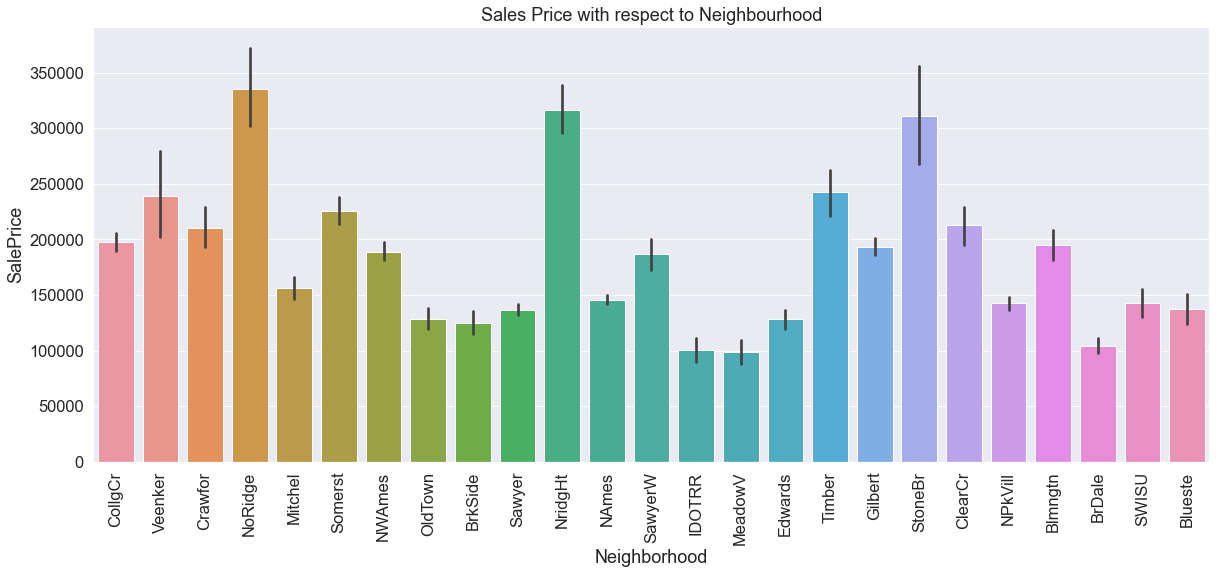

In [326]:
# Comparing 'Sale Price' with  'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= house_df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)


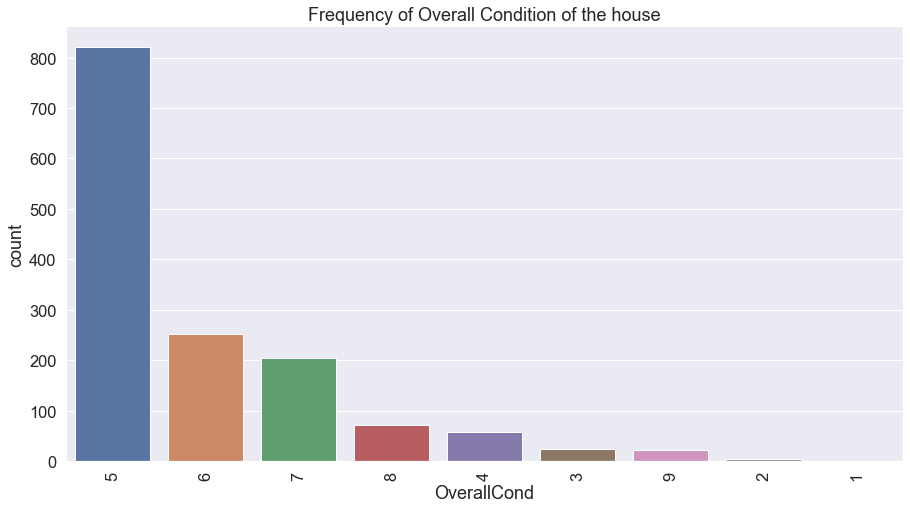

In [328]:
fig  =  plt.figure(figsize = (15,8))
sns.countplot(x  =  'OverallCond', data  =  house_df, order  =  house_df['OverallCond'].value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Frequency of Overall Condition of the house')
plt.show()

 __Observation__
 - Most houses are with quality 5: Average and 6:Above Average.


### Plotting scatter plot with numerical Datas

<Figure size 2160x720 with 0 Axes>

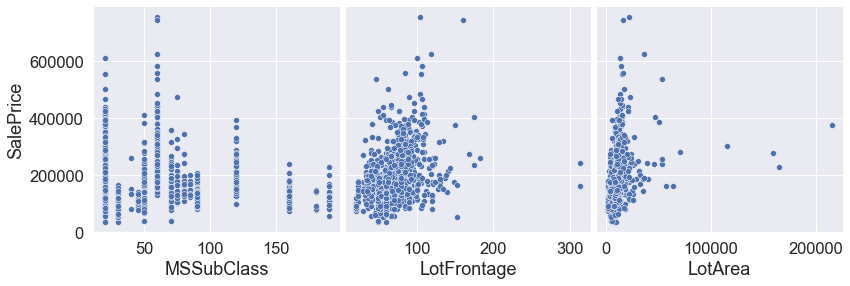

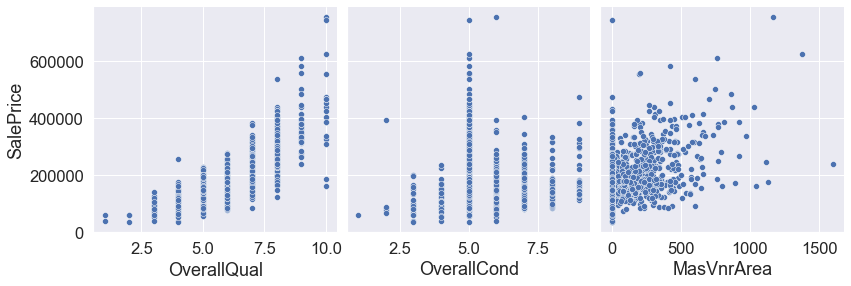

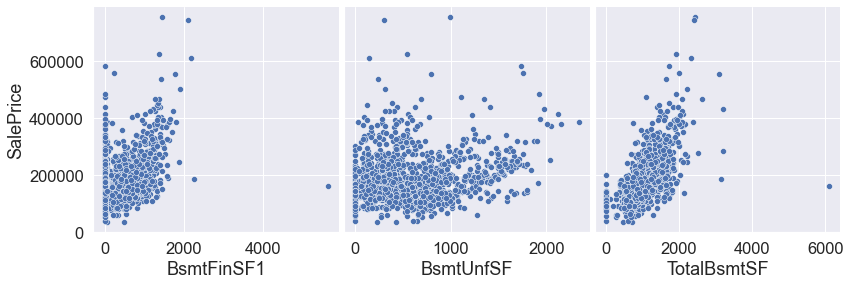

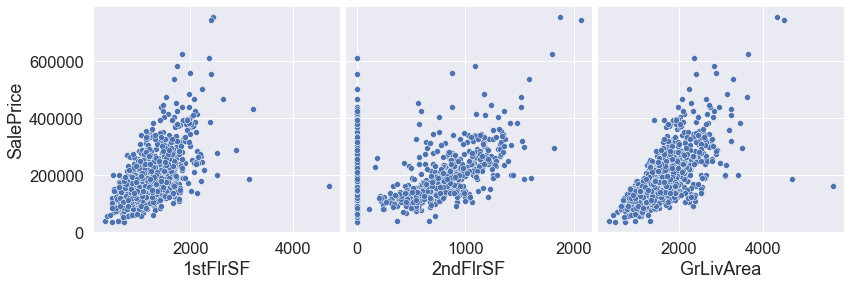

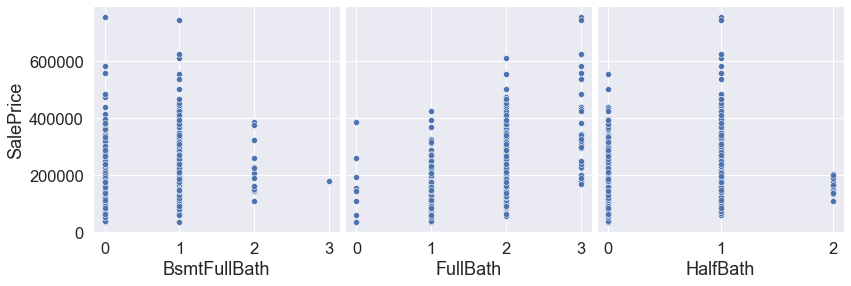

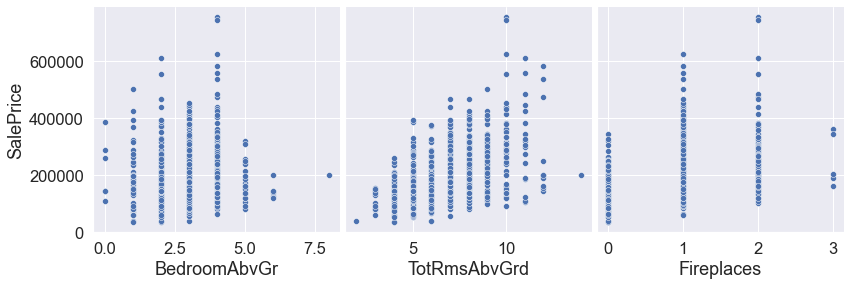

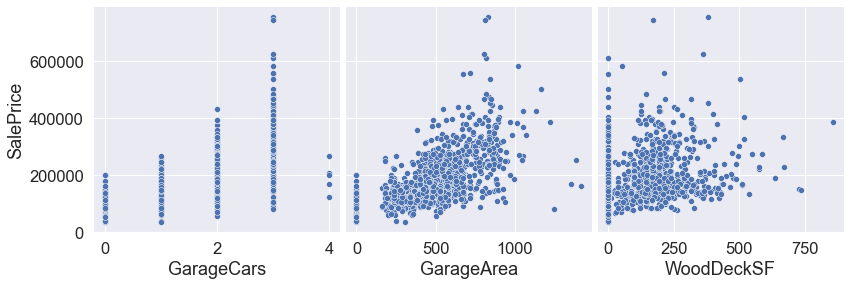

In [410]:
plt.figure(figsize=(30,10))
sns.pairplot(house_df, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house_df, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

__Observation__ 

- Total Basement SqFeet(TotalBsmtSF) plays an important role in estimating the SalePrice of the house. SalePrice has gone higher for the houses with TotalBsmtSF between 2000 to 3000.
- GrLivArea has an increasing trend with SalePrice.
- TotRmsAbvGrd has a positive result in SalePrice. 
- If the number of rooms increases Sale price also increases.
- SalePrice of the house is high with Fireplaces as 2.
- SalePrice is highest if the house has GarageCars 3. 


In [214]:
## dropping features with more than 80% of the similar values or category
#MiscVal,3SsnPorch,ScreenPorch,PoolArea,Alley,PoolQC,MiscFeature,Fence,LowQualFinSF

house_df2= house_df.drop(['MiscVal','3SsnPorch','ScreenPorch','PoolArea','Alley','PoolQC','MiscFeature','Fence','LowQualFinSF'],axis='columns')

In [215]:
house_df2.shape

(1460, 72)

In [216]:
house_df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


In [217]:
house_df2.LotFrontage.isna().sum()

259

In [218]:
house_df2.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

## Number of columns with integer datatype.

In [219]:
house_df2.shape

(1460, 72)

### Fill NA values in LotFrontage feature

Text(0.5, 1.0, 'Distribution of LotFrontage')

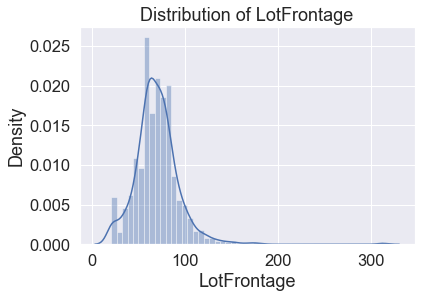

In [220]:
sns.distplot(house_df2['LotFrontage']).set_title("Distribution of LotFrontage")

In [221]:
house_df2[["LotFrontage"]] = house_df2[["LotFrontage"]].fillna(value=house_df2["LotFrontage"].mean())

In [222]:
house_df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1.0, 'Distribution of MasVnrArea')

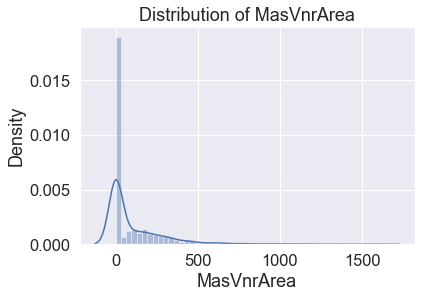

In [223]:
# similarly for MasVnrArea
sns.distplot(house_df2['MasVnrArea']).set_title("Distribution of MasVnrArea")

##### For  MasVnrArea we shouldn't use mean for replacing NA. Because the values are skewed. We should instead use Median.

In [224]:
house_df2[["MasVnrArea"]] = house_df2[["MasVnrArea"]].fillna(value=house_df2["MasVnrArea"].median())

In [225]:
house_df2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


In [226]:
house_df2.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [227]:
house_df2.FireplaceQu.fillna('No Fireplace',inplace=True)
house_df2.MasVnrType.fillna('None',inplace=True)
house_df2.BsmtQual.fillna('No Basement',inplace=True)
house_df2.BsmtCond.fillna('No Basement',inplace=True)
house_df2.BsmtExposure.fillna('No Basement',inplace=True)
house_df2.BsmtFinType1.fillna('No Basement',inplace=True)
house_df2.BsmtFinType2.fillna('No Basement',inplace=True)
house_df2.GarageType.fillna('No Garage',inplace=True)
house_df2.GarageFinish.fillna('No Garage',inplace=True)
house_df2.GarageQual.fillna('No Garage',inplace=True)
house_df2.GarageCond.fillna('No Garage',inplace=True)

In [228]:
house_df2.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0


In [229]:
house_df2[["Electrical"]] = house_df2[["Electrical"]].fillna(value=house_df2['Electrical'].mode().get(key=0))
house_df2[["GarageYrBlt"]] = house_df2[["GarageYrBlt"]].fillna(value=house_df2['GarageYrBlt'].mode().get(key=0))

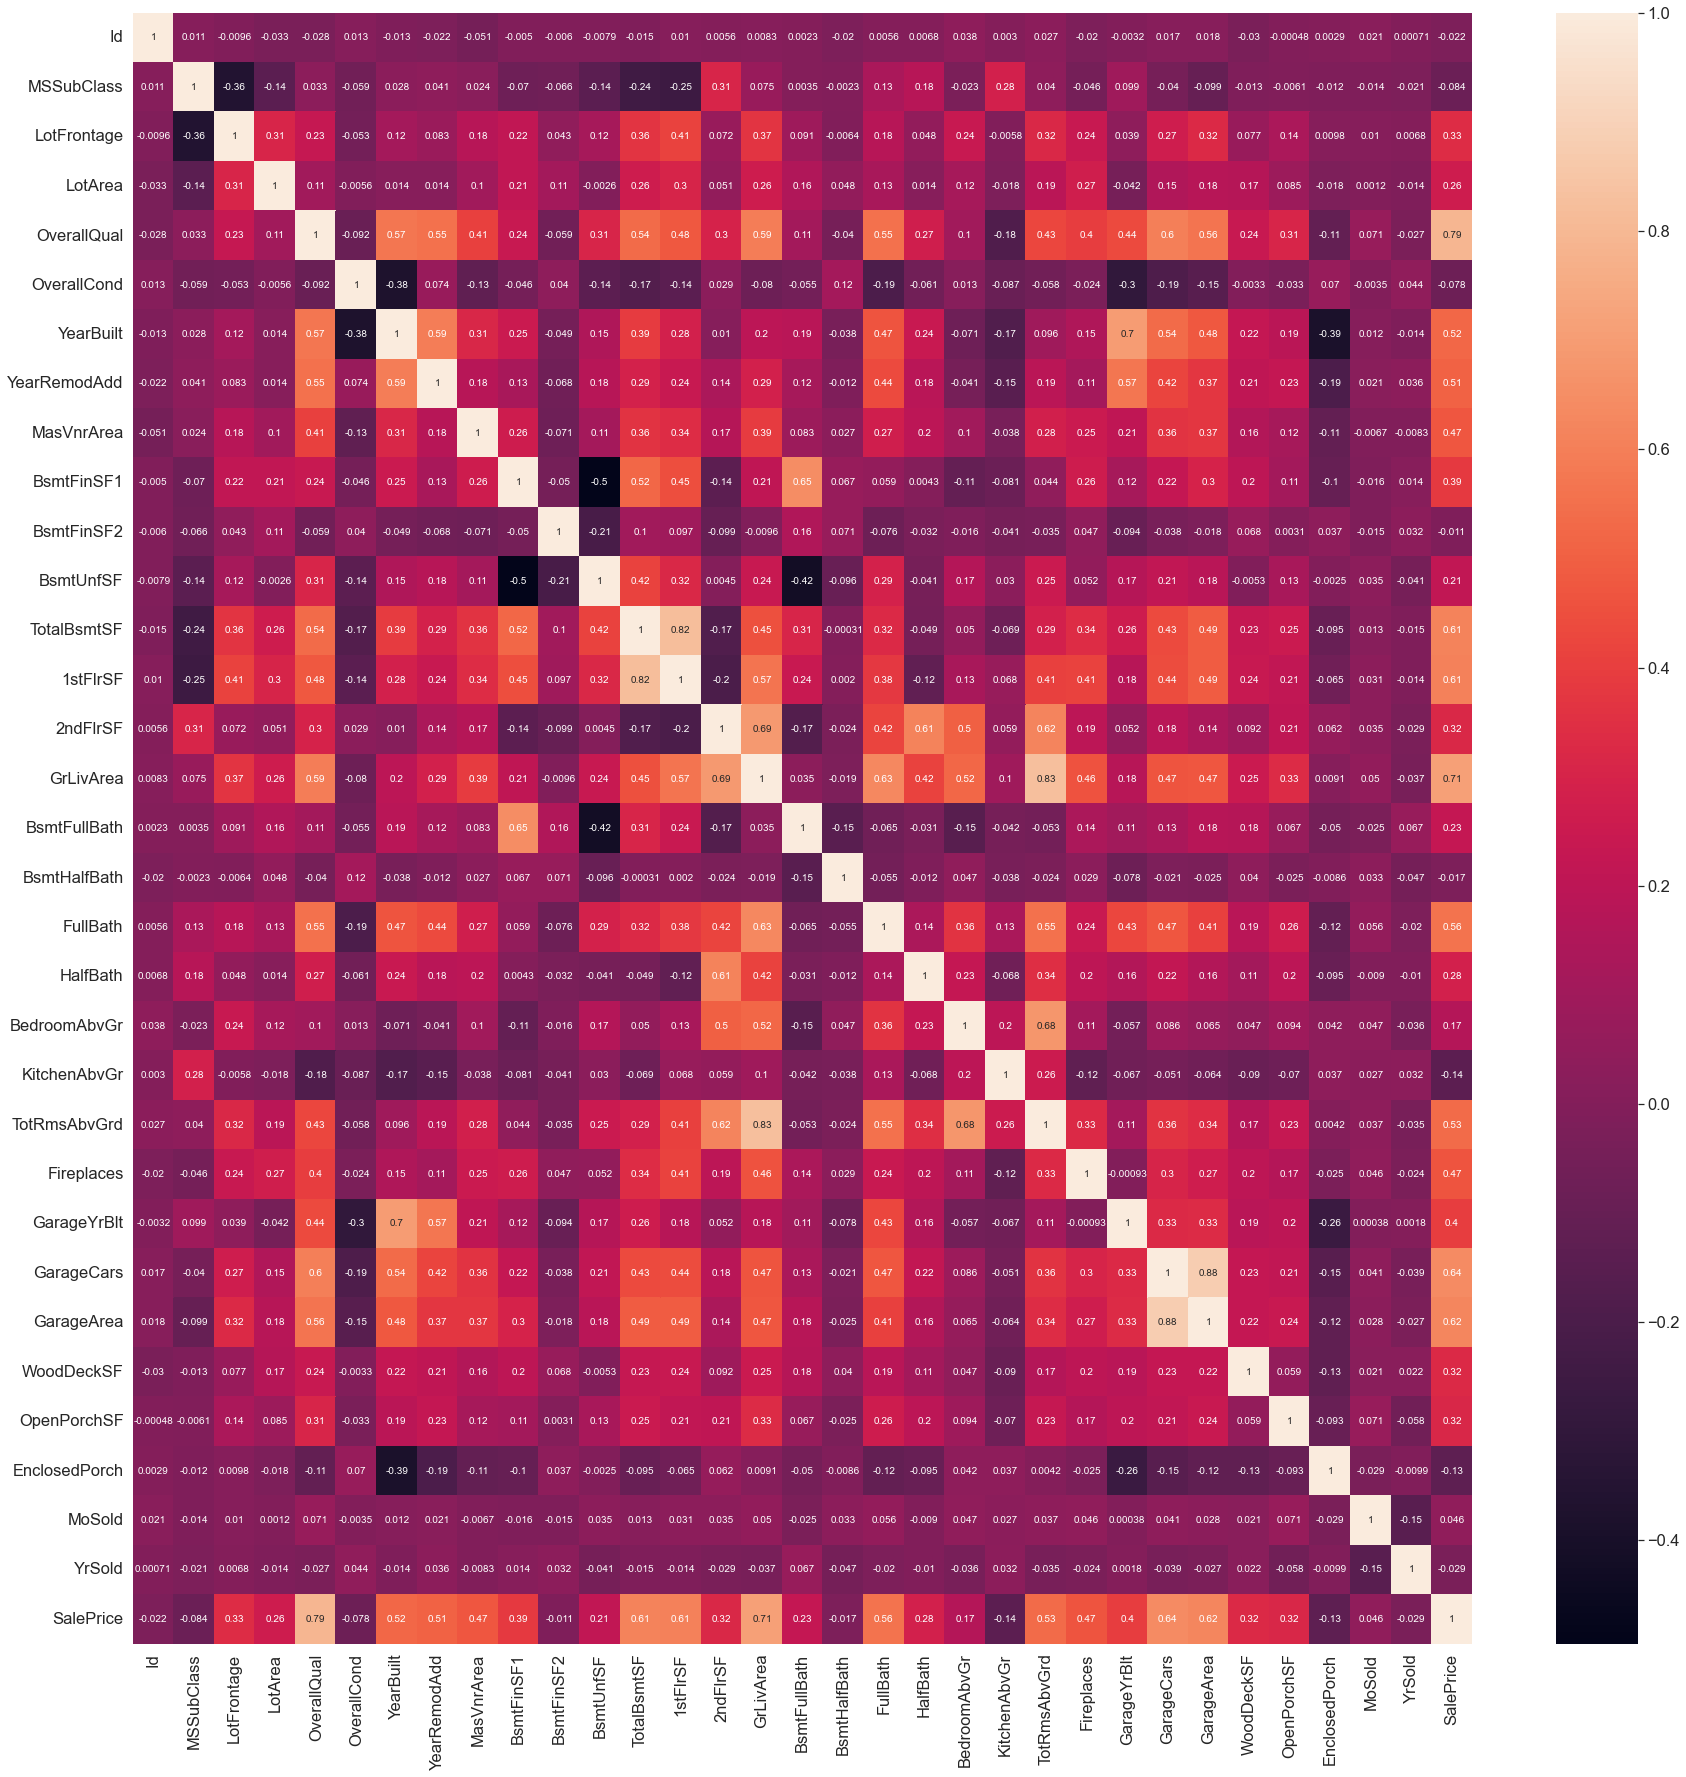

In [230]:
plt.figure(figsize=(30,30))
sns.heatmap(house_df2[list(house_df2.dtypes[house_df2.dtypes!='object'].index)].corr(),annot=True)
plt.show()

### Removing Outliers using interquartile range

In [231]:
num_col = list(house_df2.dtypes[house_df2.dtypes !='object'].index)

def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df2 = drop_outliers(house_df2)

In [232]:
house_df2.shape

(1453, 72)

In [233]:
correlated_features = set()
correlation_matrix = house_df2.drop('SalePrice', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.80:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [234]:
correlated_features

{'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'}

In [235]:
house_df3=house_df2.drop(correlated_features,axis='columns') ## Dropping Highly cor

In [236]:
house_df3.shape

(1453, 69)

In [237]:
house_df_category = house_df3.select_dtypes(include=[object]) ## Finding out the total category features

In [238]:
house_df_category.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### Some of the categorical values can be converted in to ordinal values

In [239]:
house_df2[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape','LandSlope','ExterQual']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape,LandSlope,ExterQual
0,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg,Gtl,Gd
1,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg,Gtl,TA
2,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1,Gtl,Gd
3,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1,Gtl,TA
4,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1,Gtl,Gd


In [240]:
house_df2.BsmtFinType1.value_counts()

Unf            430
GLQ            414
ALQ            218
BLQ            148
Rec            132
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [241]:
house_df2.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [242]:
house_df2['BsmtQual'] = house_df2.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df2['BsmtCond'] = house_df2.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df2['BsmtExposure'] = house_df2.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df2['BsmtFinType1'] = house_df2.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df2['BsmtFinType2'] = house_df2.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df2['HeatingQC'] = house_df2.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df2['CentralAir'] = house_df2.CentralAir.map({'N':0,'Y':1})
house_df2['KitchenQual'] = house_df2.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df2['GarageFinish'] = house_df2.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
house_df2['GarageQual'] = house_df2.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df2['GarageCond'] = house_df2.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df2['ExterCond'] = house_df2.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df2['LotShape'] = house_df2.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house_df2['LandSlope'] = house_df2.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_df2['ExterQual'] = house_df2.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

In [243]:
house_df2.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [244]:
house_df2=house_df2.drop(['Id','Street','Utilities'],axis='columns')

In [245]:
house_df2.shape

(1453, 69)

In [246]:
dummy_col = pd.get_dummies(house_df2[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','FireplaceQu','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

In [247]:
house_df2 = pd.concat([house_df2,dummy_col],axis='columns')

In [248]:
house_df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,3,2,PConc,4,3,1,6,706,1,0,150,856,GasA,4,1,SBrkr,856,854,1710,1,0,2,1,3,1,3,8,Typ,0,No Fireplace,Attchd,2003.0,2,2,548,3,3,Y,0,61,0,2,2008,WD,Normal,208500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,3,Lvl,FR2,0,Veenker,

In [249]:
house_df2 = house_df2.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','FireplaceQu','GarageType','PavedDrive','SaleType','SaleCondition'],
                           axis='columns')

#### Modifying Year columns based on the maximum year data available in the corresponding feature

In [250]:
house_df2['YearBuilt_updated'] = house_df2.YearBuilt.max()-house_df2.YearBuilt
house_df2['YearRemodAdd_updated'] = house_df2.YearRemodAdd.max()-house_df2.YearRemodAdd
house_df2['GarageYrBlt_updated'] = house_df2.GarageYrBlt.max()-house_df2.GarageYrBlt
house_df2['YrSold_updated'] = house_df2.YrSold.max()-house_df2.YrSold

### Dropping the unwanted columns

In [251]:
house_df2 = house_df2.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','LandSlope'],axis='columns')

In [252]:
house_df2.isna().sum()

MSSubClass                  0
LotFrontage                 0
LotArea                     0
LotShape                    0
OverallQual                 0
OverallCond                 0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
BsmtQual                    0
BsmtCond                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
CentralAir                  0
1stFlrSF                    0
2ndFlrSF                    0
GrLivArea                   0
BsmtFullBath                0
BsmtHalfBath                0
FullBath                    0
HalfBath                    0
BedroomAbvGr                0
KitchenAbvGr                0
KitchenQual                 0
TotRmsAbvGrd                0
Fireplaces                  0
GarageFinish                0
GarageCars

In [253]:
house_df2[['BsmtQual','BsmtCond']]

,BsmtQual,BsmtCond
0,4,3
1,4,3
2,4,3
3,3,4
4,4,3
...,...,...
1455,4,3
1456,4,3
1457,3,4
1458,3,3


In [254]:
house_df2.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YearBuilt_updated,YearRemodAdd_updated,GarageYrBlt_updated,YrSold_updated
0,60,65.0,8450,3,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,1710,1,0,2,1,3,1,3,8,0,2,2,548,3,3,0,61,0,2,208500,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,7,7,7.0,2
1,20,80.0,9600,3,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,1262,0,1,2,0,3,1,2,6,1,2,2,460,3,3,298,0,0,5,181500,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,

###  The Sale Price looks like it is  distributed normally with a slight skew towards the right

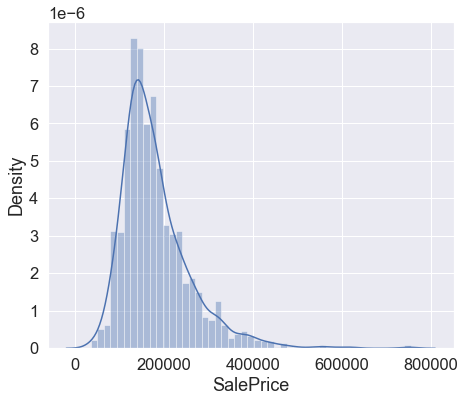

In [255]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(house_df2.SalePrice)

### Creating House train and test data

In [256]:
from sklearn.model_selection import train_test_split
housedf_train,housedf_test = train_test_split(house_df2,train_size=0.7,test_size=0.3,random_state=42)

In [257]:
scale_col=['MSSubClass','LotFrontage','LotArea','LotShape','OverallQual','OverallCond','MasVnrArea','ExterQual','ExterCond','BsmtQual','BsmtCond'
          ,'BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','HeatingQC','1stFlrSF','2ndFlrSF'
          ,'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd'
          ,'Fireplaces','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','WoodDeckSF','OpenPorchSF','EnclosedPorch','MoSold'
          ,'SalePrice']

#scale_col = ['MSSubClass','LotFrontage','LotArea','LotShape','OverallQual','OverallCond',
#           'MasVnrArea','BsmtFinSF1','ExterQual',
#           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
#           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
#          'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
#          'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
#          'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = MinMaxScaler()
housedf_train[scale_col] = scaler.fit_transform(housedf_train[scale_col])
housedf_test[scale_col] = scaler.transform(housedf_test[scale_col])

### Checking whether the saleprice is distributed similary across test and train dataset

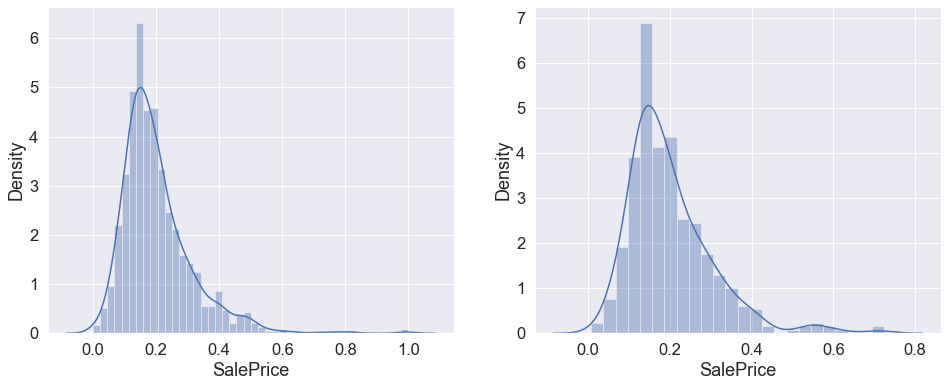

In [258]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(housedf_train.SalePrice)
plt.subplot(122)
sns.distplot(housedf_test.SalePrice)

##### Creating X and y for assiging Dependent and independent variable

In [259]:
y_train = housedf_train.pop('SalePrice')
X_train = housedf_train
y_test = housedf_test.pop('SalePrice')
X_test = housedf_test

In [260]:
# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [261]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 7),
 ('LotArea', True, 1),
 ('LotShape', False, 119),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 4),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 113),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 112),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', False, 141),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 78),
 ('CentralAir', False, 79),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', False, 32),
 ('BsmtFullBath', False, 96),
 ('BsmtHalfBath', False, 134),
 ('FullBath', False, 6),
 ('HalfBath', False, 107),
 ('BedroomAbvGr', False, 10),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 9),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 97),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', False, 22),
 ('GarageCond', False, 137)

In [265]:
rfe_features = X_train.columns[rfe.support_]
len(rfe_features)

50

In [276]:
X_train_house_features = X_train[rfe_features]
X_test_house_features = X_test[rfe_features]

In [275]:
#Creating Constant
#X_train_bike1 = sm.add_constant(X_train_bike1_features)


#house_prediction_lm1= sm.OLS(y_train, X_train_house_features).fit()

In [277]:
X_train_house_features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_FR3,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition2_Feedr,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_CemntBd,Exterior1st_Stone,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Stone,Foundation_Slab,Foundation_Wood,Heating_GasW,Heating_OthW,Functional_Sev,Functional_Typ,GarageType_No Garage,SaleType_ConLI,SaleType_New,SaleType_Oth
438,0.058824,0.040263,0.444444,0.625,0.000000,0.333333,0.6,0.75,0.25,0.161504,0.000000,0.137243,0.128388,0.0,0.0,0.666667,0.333333,0.25,0.253237,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1295,0.000000,0.099740,0.444444,0.500,0.121916,0.333333,0.6,0.75,0.75,0.449558,0.000000,0.328135,0.256063,0.0,0.0,0.333333,0.000000,0.25,0.207194,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
625,0.000000,0.122838,0.555556,0.625,0.189405,0.333333,0.6,0.75,0.25,0.000000,0.000000,0.348097,0.278887,0.0,0.0,0.333333,0.000000,0.50,0.316547,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
594,0.000000,0.093821,0.444444,0.625,0.000000,0.333333,0.8,0.75,0.25,0.000000,0.000000,0.288210,0.210414,0.0,0.0,0.333333,0.000000,0.25,0.201439,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
633,0.000000,0.112011,0.444444,0.750,0.000000,0.333333,0.6,0.75,0.25,0.212389,0.317503,0.329382,0.257489,0.0,0.0,0.333333,0.000000,0.25,0.187050,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [278]:
X_test_house_features.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,KitchenAbvGr,KitchenQual,Fireplaces,GarageCars,GarageArea,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_FR3,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition2_Feedr,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_CemntBd,Exterior1st_Stone,Exterior2nd_AsphShn,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Stone,Foundation_Slab,Foundation_Wood,Heating_GasW,Heating_OthW,Functional_Sev,Functional_Typ,GarageType_No Garage,SaleType_ConLI,SaleType_New,SaleType_Oth
797,0.000000,0.089303,0.444444,0.50,0.000000,0.333333,0.6,0.75,0.25,0.252212,0.0,0.241110,0.156562,0.0,0.0,0.333333,0.000000,0.25,0.172662,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1131,0.000000,0.133117,0.444444,0.50,0.000000,0.333333,0.8,0.75,0.50,0.093805,0.0,0.303805,0.228245,0.0,0.0,0.333333,0.000000,0.00,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1004,0.588235,0.024412,0.666667,0.50,0.011611,0.666667,0.8,0.75,0.25,0.007080,0.0,0.419838,0.417261,0.0,0.0,0.666667,0.333333,0.50,0.328777,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
731,0.352941,0.116919,0.666667,0.50,0.320755,0.666667,1.0,0.75,0.75,0.347788,0.0,0.270742,0.289586,0.0,0.0,0.666667,0.333333,0.50,0.315108,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
532,0.000000,0.082417,0.444444,0.75,0.000000,0.333333,0.0,0.00,0.00,0.000000,0.0,0.000000,0.175820,0.0,0.0,0.333333,0.333333,0.25,0.282014,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [337]:
print(X_test_house_features.shape)
print(X_train_house_features.shape)
print(X_train.shape)
print(X_test.shape)

(436, 50)
(1017, 50)
(1017, 195)
(436, 195)


In [290]:
print(lm.intercept_)
print(lm.coef_)

-0.20469974899422821
[-2.96624059e-02  2.13131187e-02  4.80154932e-02  2.56301373e-03
  1.03827392e-01  7.63959955e-02  8.29738880e-02  2.16050319e-02
 -2.24220051e-02  4.35624215e-02 -4.95326093e-02  2.79619391e-02
 -4.09920276e-03  7.85968568e-02 -3.42059595e-03  3.00847504e-02
  3.90072074e-04  6.95212186e-02  6.03613612e-03 -1.00194900e-02
  8.86781049e-02  1.35953553e-01  1.56484409e-01  4.16238440e-03
 -1.25450156e-03  1.43930362e-02 -8.32315259e-03 -5.44063113e-02
 -4.25448211e-02  2.46661625e-02  2.64810456e-02  4.47612057e-02
  3.83887103e-03  4.06124723e-02  2.19291276e-02  3.68668215e-02
 -3.25053804e-03  6.01219215e-03  2.07779780e-03 -3.89709797e-03
 -1.15731365e-02  6.66284304e-02  6.71295200e-02  5.26405413e-02
  4.73206352e-02  2.08941523e-02 -1.59923617e-03  1.27083816e-02
  1.82139713e-02 -1.25485265e-02 -2.73283784e-02 -8.75591798e-04
 -1.59249790e-03  3.16661410e-03 -6.97997858e-03 -2.53095879e-02
 -2.54699094e-02  1.03397955e-02 -2.94043388e-02 -1.93252475e-02
 -1.

In [338]:
lm = LinearRegression()
lm.fit(X_train_house_features, y_train)
y_pred_train = lm.predict(X_train_house_features)
y_pred_test = lm.predict(X_test_house_features)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lr)
metric.append(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lr)
metric.append(mse_test_lr)
metric.append(mse_test_lr**0.5)

Train R2 Score:  0.9013244453649428
Test R2 Score:  0.8561753198341578
Train RSS:  1.2741880419846359
Test RSS:  0.6775448234273602
Train MSE:  0.0012528889301717167
Test MSE:  0.0015540018885948628


Text(0.5, 0, 'Errors')

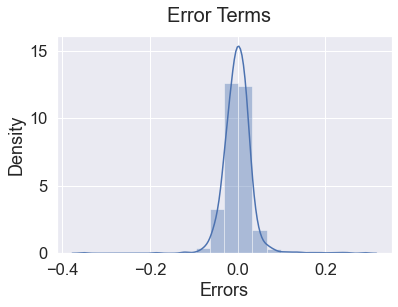

In [355]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### From the below residual plot we can see that there isn't any proper pattern between residuals and predicted values

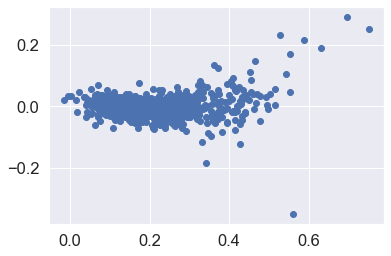

In [357]:
# Residual Plot 
plt.scatter(y_pred_train,(y_train - y_pred_train))
plt.show()

__Homoscedasticity Check__

#### Setting up list of alpha values for Ridge and Lasso Regression

In [279]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### Creating Lasso Regression

In [378]:
lasso = Lasso()
folds=KFold(n_splits=5,shuffle=True,random_state=42)
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    6.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [379]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [380]:
cv_result_lasso = pd.DataFrame(model_cv.cv_results_)
cv_result_lasso['param_alpha'] = cv_result_lasso['param_alpha'].astype('float32')
cv_result_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.383748,0.184994,0.013127,0.005658,0.0001,{'alpha': 0.0001},-0.027874,-0.026662,-0.024268,-0.023949,-0.027161,-0.025983,0.001581,1,-0.021412,-0.021905,-0.022426,-0.022196,-0.021229,-0.021833,0.000454
1,0.027574,0.007796,0.006558,0.001748,0.0010,{'alpha': 0.001},-0.029393,-0.026686,-0.027057,-0.027287,-0.030303,-0.028145,0.001433,2,-0.027319,-0.026976,-0.027032,-0.026879,-0.026552,-0.026952,0.000248
2,0.019351,0.002913,0.007157,0.001243,0.0100,{'alpha': 0.01},-0.058709,-0.054291,-0.057246,-0.055282,-0.059875,-0.057080,0.002074,3,-0.056321,-0.057310,-0.056909,-0.056714,-0.056094,-0.056670,0.000430
3,0.019224,0.000864,0.009139,0.003336,0.0500,{'alpha': 0.05},-0.067379,-0.060192,-0.063145,-0.060000,-0.066128,-0.063369,0.003006,6,-0.061803,-0.064073,-0.063438,-0.064265,-0.062550,-0.063226,0.000930
4,0.018427,0.000708,0.006466,0.000450,0.1000,{'alpha': 0.1},-0.067573,-0.059950,-0.063015,-0.059782,-0.065850,-0.063234,0.003112,5,-0.061644,-0.063944,-0.063266,-0.064133,-0.062444,-0.063086,0.000933


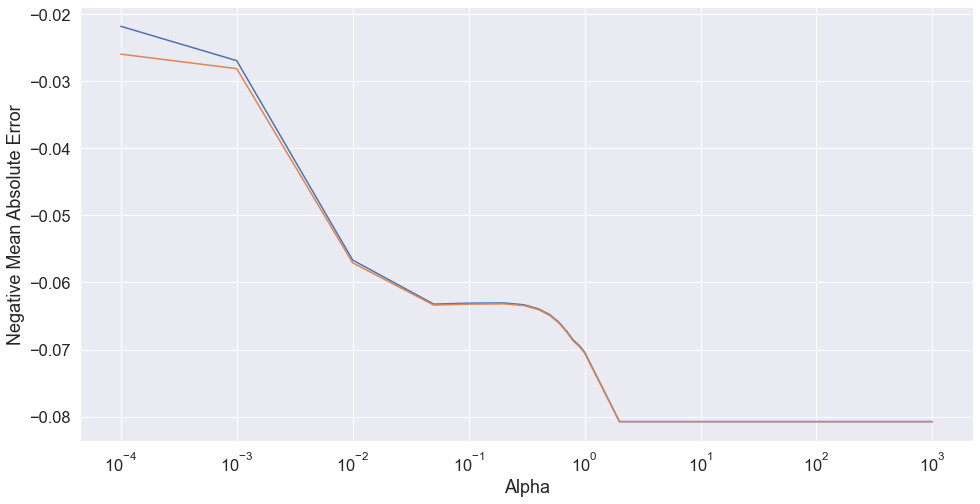

In [346]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_train_score'])
plt.plot(cv_result_lasso['param_alpha'],cv_result_lasso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.xlabel('Alpha')
plt.show()

In [344]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [345]:
# Calculationg metrics for Lasso Regression. R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metricLasso = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lasso)
metricLasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lasso)
metricLasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lasso)
metricLasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lasso)
metricLasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lasso)
metricLasso.append(mse_train_lasso)
metricLasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lasso)
metricLasso.append(mse_test_lasso)
metricLasso.append(mse_test_lasso**0.5)

Train R2 Score:  0.910063778177896
Test R2 Score:  0.8862828869591676
Train RSS:  1.1613378694533258
Test RSS:  0.5357108473112995
Train MSE:  0.0011419251420386684
Test MSE:  0.0012286946039249988


In [294]:
metricLasso

[0.910063778177896,
 0.8862828869591676,
 1.1613378694533258,
 0.5357108473112995,
 0.0011419251420386684,
 0.03379238289968123,
 0.0012286946039249988,
 0.03505274031976671]

### Creating Ridge Regression

In [347]:
ridge = Ridge()

# cross validation
folds = KFold(n_splits=5,shuffle=True,random_state=42)
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [348]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [349]:
cv_result_ridge = pd.DataFrame(model_cv.cv_results_)
cv_result_ridge['param_alpha'] = cv_result_ridge['param_alpha'].astype('float32')
cv_result_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023791,0.020882,0.003691,0.000297,0.0001,{'alpha': 0.0001},-0.029217,-0.031532,-0.028380,-0.026956,-0.030140,-0.029245,0.001550,24,-0.019919,-0.020624,-0.021282,-0.021274,-0.020111,-0.020642,0.000568
1,0.010928,0.001390,0.003436,0.000402,0.0010,{'alpha': 0.001},-0.029212,-0.031429,-0.028364,-0.026935,-0.030121,-0.029212,0.001526,23,-0.019920,-0.020622,-0.021283,-0.021274,-0.020110,-0.020642,0.000568
2,0.012075,0.002439,0.004538,0.001116,0.0100,{'alpha': 0.01},-0.029167,-0.030944,-0.028225,-0.026768,-0.029955,-0.029012,0.001435,22,-0.019929,-0.020632,-0.021288,-0.021273,-0.020109,-0.020646,0.000567
3,0.018548,0.004078,0.006565,0.001603,0.0500,{'alpha': 0.05},-0.029016,-0.030480,-0.027844,-0.026374,-0.029506,-0.028644,0.001417,21,-0.019975,-0.020696,-0.021325,-0.021271,-0.020131,-0.020680,0.000559
4,0.013323,0.002022,0.004192,0.000757,0.1000,{'alpha': 0.1},-0.028873,-0.030101,-0.027565,-0.026125,-0.029110,-0.028355,0.001377,20,-0.020032,-0.020748,-0.021368,-0.021272,-0.020190,-0.020722,0.000544


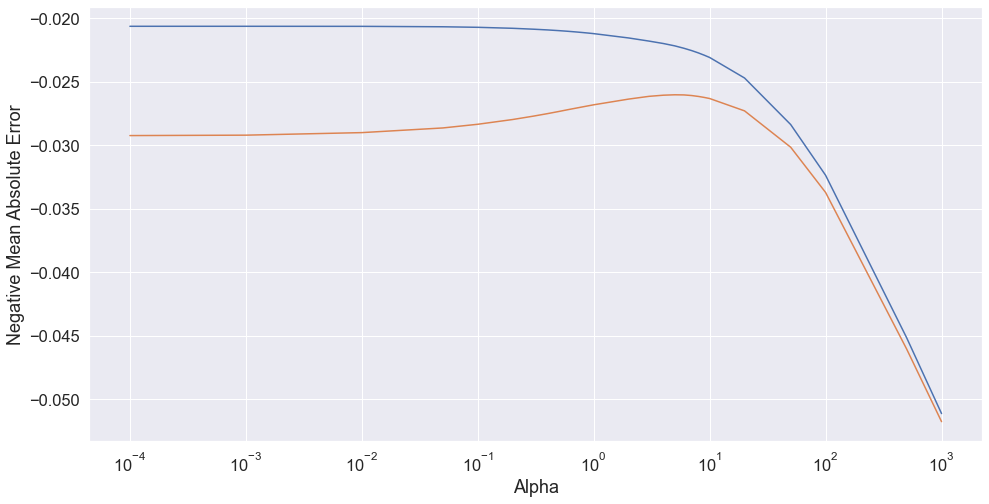

In [353]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_train_score'])
plt.plot(cv_result_ridge['param_alpha'],cv_result_ridge['mean_test_score'])
plt.xlabel('Alpha')
plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.show()

In [381]:
#Fitting Ridge model for alpha = 0.8 and printing coefficients which have been penalised
alpha = 5.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.23607353e-02  2.64804226e-02  2.93074590e-02  5.77027179e-04
  7.91947233e-02  4.81874244e-02  4.82951857e-02  3.24988954e-02
 -4.09901540e-03  2.76154244e-02 -2.58791233e-02  3.34346730e-02
  1.66716756e-03  6.36674400e-02  4.16086911e-03  1.07406529e-02
  4.25751337e-03  5.29213000e-02  5.58699547e-03 -1.80736772e-03
  7.13545965e-02  7.25628424e-02  8.17189382e-02  8.09602535e-03
 -8.72119071e-05  3.17928603e-02  7.11540030e-03 -1.17687796e-02
 -1.81428342e-02  3.63087032e-02  4.06646708e-02  4.29054202e-02
  7.15239108e-03  3.33051749e-02  3.30211752e-02  7.98146345e-03
 -5.82616253e-03  1.59306016e-02  7.76004808e-03 -3.32450735e-03
 -1.13391259e-02  9.65642666e-03  1.28973421e-02  6.26794439e-03
  3.94168238e-03  1.65705737e-02  4.21257432e-03  1.09279335e-02
  1.86706594e-02 -1.37675135e-02 -8.21186195e-03 -1.61354364e-03
 -1.63405621e-03  5.02146433e-03  8.19154366e-03 -4.06579482e-03
 -1.69332022e-02  2.36715471e-02 -1.95173410e-02 -1.52171652e-02
 -9.37972194e-03  4.83131

In [382]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metricRidge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_ridge)
metricRidge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_ridge)
metricRidge.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_ridge)
metricRidge.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_ridge)
metricRidge.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_ridge)
metricRidge.append(mse_train_ridge)
metricRidge.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_ridge)
metricRidge.append(mse_test_ridge)
metricRidge.append(mse_test_ridge**0.5)

Train R2 Score:  0.9041824875893231
Test R2 Score:  0.8806709112345101
Train RSS:  1.2372824148588406
Test RSS:  0.5621483481425698
Train MSE:  0.0012166002112672966
Test MSE:  0.0012893310737214902


### Creating table to cross check all the metrics across Regression Models

In [303]:
Regression_table={'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','RMSE (Train)','MSE (Test)','RMSE (Test)'], 
        'Linear Regression': metric}

In [305]:
Regression_table = pd.DataFrame(Regression_table ,columns = ['Metric', 'Linear Regression'] )

In [306]:
Regression_table

,Metric,Linear Regression
0,R2 Score (Train),0.921262
1,R2 Score (Test),0.854934
2,RSS (Train),1.016733
3,RSS (Test),0.683394
4,MSE (Train),0.001000
5,RMSE (Train),0.031619
6,MSE (Test),0.001567
7,RMSE (Test),0.039591


In [311]:
Ridge_metric = pd.Series(metricRidge, name = 'Ridge Regression')

In [312]:
Lasso_metric = pd.Series(metricLasso, name = 'Lasso Regression')

In [315]:
Regression_Table=pd.concat([Regression_table,Ridge_metric,Lasso_metric],axis=1)

In [339]:
Regression_Table

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.921262,0.904182,0.910064
1,R2 Score (Test),0.854934,0.880671,0.886283
2,RSS (Train),1.016733,1.237282,1.161338
3,RSS (Test),0.683394,0.562148,0.535711
4,MSE (Train),0.001000,0.001217,0.001142
5,RMSE (Train),0.031619,0.034880,0.033792
6,MSE (Test),0.001567,0.001289,0.001229
7,RMSE (Test),0.039591,0.035907,0.035053


### Comparing Coefficients of different models

In [319]:
Model_Coef=pd.DataFrame({"Feature":X_train.columns})

In [320]:
Model_Coef

,Feature
0,MSSubClass
1,LotFrontage
2,LotArea
3,LotShape
4,OverallQual
5,OverallCond
6,MasVnrArea
7,ExterQual
8,ExterCond
9,BsmtQual


In [321]:
Model_Coef['Ridge'] = ridge.coef_
Model_Coef['Lasso'] = lasso.coef_

In [322]:
Model_Coef

,Feature,Ridge,Lasso
0,MSSubClass,-0.022361,-0.026514
1,LotFrontage,0.026480,0.022702
2,LotArea,0.029307,0.026601
3,LotShape,0.000577,0.001651
4,OverallQual,0.079195,0.103052
5,OverallCond,0.048187,0.064805
6,MasVnrArea,0.048295,0.067292
7,ExterQual,0.032499,0.026726
8,ExterCond,-0.004099,-0.000146
9,BsmtQual,0.027615,0.017815


In [323]:
Model_Coef_ = Model_Coef[Model_Coef["Lasso"] > 0]

In [324]:
Model_Coef.shape

(195, 3)

In [325]:
Model_Coef_.shape

(60, 3)

In [354]:
Model_Coef_

,Feature,Ridge,Lasso
1,LotFrontage,0.026480,0.022702
2,LotArea,0.029307,0.026601
3,LotShape,0.000577,0.001651
4,OverallQual,0.079195,0.103052
5,OverallCond,0.048187,0.064805
6,MasVnrArea,0.048295,0.067292
7,ExterQual,0.032499,0.026726
9,BsmtQual,0.027615,0.017815
11,BsmtExposure,0.033435,0.032505
13,BsmtFinSF1,0.063667,0.072166


### What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [360]:
#Fitting Ridge model for alpha = 0.8 and printing coefficients which have been penalised
alpha = 10.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.09470686e-02  2.60122177e-02  2.52869216e-02 -5.77020593e-04
  6.79214340e-02  3.60532948e-02  4.05429620e-02  3.41846106e-02
 -5.29613347e-04  2.29159262e-02 -1.79439573e-02  3.39419370e-02
  5.35949511e-03  5.61047059e-02  3.83992148e-03  7.71084699e-03
  5.19575083e-03  4.68807541e-02  6.18742209e-03  8.19234984e-05
  6.10515417e-02  5.73304560e-02  6.78524455e-02  9.08064780e-03
  6.07559596e-04  3.25072163e-02  9.57193939e-03 -2.57571091e-03
 -1.15896351e-02  3.81632306e-02  3.84902016e-02  3.69492802e-02
  8.79682886e-03  3.16261517e-02  3.26166378e-02  4.50339663e-03
 -4.46641988e-03  1.64665524e-02  9.51157724e-03 -2.28954603e-03
 -1.03032718e-02  4.83552863e-03  8.84654564e-03  4.66805472e-03
  6.16569308e-04  1.23071655e-02  3.40530058e-03  8.09079433e-03
  1.72084349e-02 -1.27402205e-02 -4.69252763e-03 -1.86926807e-03
 -1.05932782e-03  3.17301878e-03  7.92373041e-03 -1.19529544e-03
 -1.71288401e-02  2.21744160e-02 -1.89433913e-02 -1.72344755e-02
 -7.51260481e-03 -1.49878

In [361]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metricRidge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_ridge)
metricRidge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_ridge)
metricRidge.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_ridge)
metricRidge.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_ridge)
metricRidge.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_ridge)
metricRidge.append(mse_train_ridge)
metricRidge.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_ridge)
metricRidge.append(mse_test_ridge)
metricRidge.append(mse_test_ridge**0.5)

Train R2 Score:  0.8925776648014194
Test R2 Score:  0.8810253015541236
Train RSS:  1.387134386609949
Test RSS:  0.5604788479827227
Train MSE:  0.0013639472828023097
Test MSE:  0.0012855019449145018


In [362]:
alpha = 0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0002)

In [363]:
# Calculationg metrics for Lasso Regression. R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metricLasso = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print("Train R2 Score: ",r2_train_lasso)
metricLasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print("Test R2 Score: ",r2_test_lasso)
metricLasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print("Train RSS: ",rss1_lasso)
metricLasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print("Test RSS: ",rss2_lasso)
metricLasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print("Train MSE: ",mse_train_lasso)
metricLasso.append(mse_train_lasso)
metricLasso.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print("Test MSE: ",mse_test_lasso)
metricLasso.append(mse_test_lasso)
metricLasso.append(mse_test_lasso**0.5)

Train R2 Score:  0.9009465371987865
Test R2 Score:  0.8858864697949379
Train RSS:  1.2790679341531228
Test RSS:  0.5375783320658761
Train MSE:  0.0012576872508880265
Test MSE:  0.0012329778258391654


In [364]:
Regression_table = pd.DataFrame(Regression_table ,columns = ['Metric', 'Linear Regression'] )
Ridge_metric = pd.Series(metricRidge, name = 'Ridge Regression')
Lasso_metric = pd.Series(metricLasso, name = 'Lasso Regression')

Regression_Table=pd.concat([Regression_table,Ridge_metric,Lasso_metric],axis=1)

In [365]:
Regression_Table

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.921262,0.892578,0.900947
1,R2 Score (Test),0.854934,0.881025,0.885886
2,RSS (Train),1.016733,1.387134,1.279068
3,RSS (Test),0.683394,0.560479,0.537578
4,MSE (Train),0.001000,0.001364,0.001258
5,RMSE (Train),0.031619,0.036932,0.035464
6,MSE (Test),0.001567,0.001286,0.001233
7,RMSE (Test),0.039591,0.035854,0.035114


In [366]:
Model_Coef['Ridge'] = ridge.coef_
Model_Coef['Lasso'] = lasso.coef_

In [367]:
Model_Coef

,Feature,Ridge,Lasso
0,MSSubClass,-0.020947,-0.031579
1,LotFrontage,0.026012,0.018592
2,LotArea,0.025287,0.010750
3,LotShape,-0.000577,0.000000
4,OverallQual,0.067921,0.108634
5,OverallCond,0.036053,0.053385
6,MasVnrArea,0.040543,0.054163
7,ExterQual,0.034185,0.029222
8,ExterCond,-0.000530,-0.000000
9,BsmtQual,0.022916,0.004135


In [368]:
Model_Coef_ = Model_Coef[Model_Coef["Lasso"] > 0]

In [369]:
Model_Coef_

,Feature,Ridge,Lasso
1,LotFrontage,0.026012,0.018592
2,LotArea,0.025287,0.010750
4,OverallQual,0.067921,0.108634
5,OverallCond,0.036053,0.053385
6,MasVnrArea,0.040543,0.054163
7,ExterQual,0.034185,0.029222
9,BsmtQual,0.022916,0.004135
11,BsmtExposure,0.033942,0.033600
13,BsmtFinSF1,0.056105,0.073540
14,BsmtFinType2,0.003840,0.001917


In [376]:
Model_Coef_[['Feature','Lasso']].sort_values(by='Lasso',ascending=False)[:10]

,Feature,Lasso
22,GrLivArea,0.314680
4,OverallQual,0.108634
112,RoofMatl_WdShngl,0.080339
13,BsmtFinSF1,0.073540
66,Neighborhood_NoRidge,0.055804
6,MasVnrArea,0.054163
5,OverallCond,0.053385
67,Neighborhood_NridgHt,0.048224
73,Neighborhood_StoneBr,0.041702
17,TotalBsmtSF,0.035579


In [377]:
Model_Coef_[['Feature','Ridge']].sort_values(by='Ridge',ascending=False)[:10]

,Feature,Ridge
4,OverallQual,0.067921
22,GrLivArea,0.067852
21,2ndFlrSF,0.057330
13,BsmtFinSF1,0.056105
112,RoofMatl_WdShngl,0.049220
66,Neighborhood_NoRidge,0.048228
17,TotalBsmtSF,0.046881
6,MasVnrArea,0.040543
29,KitchenQual,0.038163
31,Fireplaces,0.036949


## Subjective Question 3 coding part

In [390]:
X_train_new=X_train.drop(['GrLivArea','OverallQual','RoofMatl_WdShngl','BsmtFinSF1','Neighborhood_NoRidge'],axis='columns')
X_test_new=X_test.drop(['GrLivArea','OverallQual','RoofMatl_WdShngl','BsmtFinSF1','Neighborhood_NoRidge'],axis='columns')

In [389]:
X_train_new.shape

(1017, 190)

In [388]:
X_train.shape

(1017, 195)

In [398]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 0.0001}


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


In [399]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.0001)

In [400]:
lasso.coef_

array([-2.29926830e-02,  2.59987447e-02,  6.30933370e-02,  1.98099276e-03,
        7.57306028e-02,  9.27854537e-02,  4.79095791e-02, -6.17289228e-03,
        2.95824694e-02, -3.71854683e-02,  3.22131255e-02,  0.00000000e+00,
       -5.10577281e-03, -1.31807031e-02, -6.11208593e-02,  1.68757844e-01,
        1.90027437e-03, -0.00000000e+00,  2.32521521e-01,  2.04511697e-01,
        4.15982424e-03, -0.00000000e+00,  1.08877584e-02, -0.00000000e+00,
       -3.10453472e-02, -2.84336649e-02,  3.85897239e-02,  0.00000000e+00,
        4.06925436e-02,  4.88389238e-03,  3.35511260e-02,  2.49785021e-02,
        0.00000000e+00, -0.00000000e+00,  6.60419223e-03,  0.00000000e+00,
       -0.00000000e+00, -9.38973027e-03,  2.19883742e-04,  2.48521820e-03,
        0.00000000e+00, -1.83891521e-03,  1.42888475e-02,  0.00000000e+00,
        7.13530945e-03,  1.88260209e-02, -6.95733116e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  1.07121624e-02,
       -4.42877261e-03, -

In [401]:
Model_Coef_new=pd.DataFrame({"Feature":X_train_new.columns})

In [402]:
Model_Coef_new['Lasso']=lasso.coef_

In [404]:
Model_Coef_new.sort_values(by='Lasso',ascending=False)

,Feature,Lasso
18,1stFlrSF,0.232522
19,2ndFlrSF,0.204512
15,TotalBsmtSF,0.168758
5,MasVnrArea,0.092785
4,OverallCond,0.075731
2,LotArea,0.063093
6,ExterQual,0.047910
128,Exterior2nd_ImStucc,0.044814
69,Neighborhood_StoneBr,0.040768
28,Fireplaces,0.040693


## Conclusion

 __Optimal value of Lambda for Ridge Regression is 5__.
 
 __Optimal Value of Lambda for Lasso is 0.001__.
- Variables that play important role in predicting house price are.
 - GrLivArea, OverallQual , RoofMatl_WdShngl, BsmtFinSF1,Neighborhood_NoRidge ,MasVnrArea ,OverallCond,Neighborhood_NridgHt,Neighborhood_StoneBr,TotalBsmtSF 
  
  
  
  - __R-Squared Value__
  - Ridge Train : 0.892578
  - Ridge Test  : 0.881025
  - Lasso Train : 0.900947
  - Lasso Test  : 0.885886